## Dimensionality reduction and PCA

Let's revisit the MNIST digits dataset. 

Notebook objectives: 

* Learn sklearn syntax for PCA 
* Look at an exmaple of using PCA for visualization
* Learn how to use a scree plot to explore how many principal components to keep 

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load the digits dataset
digits = datasets.load_digits()
print(digits.data.shape) 

(1797, 64)


In [3]:
# This is what one digit looks like in numbers
digits.data[166].reshape(8,8)

array([[ 0.,  0.,  5., 16., 15.,  1.,  0.,  0.],
       [ 0.,  1., 15.,  9., 10., 12.,  0.,  0.],
       [ 0.,  3., 16.,  1.,  0., 16.,  4.,  0.],
       [ 0.,  6., 16.,  0.,  0., 11.,  6.,  0.],
       [ 0.,  3., 16.,  1.,  0., 11.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  3., 15.,  4.,  0.],
       [ 0.,  1., 13., 13., 13., 14.,  1.,  0.],
       [ 0.,  0.,  4., 13., 14.,  1.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

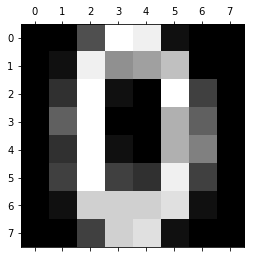

In [4]:
# Take the shading for each pixel and plot it as color
plt.gray()
plt.matshow(digits.images[166])
plt.show()

In [5]:
# Center the data on 0 
# We should do this (almost) all of the time so that we don't fit to covariates 
# that happen to be on larger scales and have more variance

X_centered = digits.data - digits.data.mean()
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.5,random_state=42)

print(X_train.shape)

(898, 64)


## Let's do some PCA!

In [6]:
# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=2)
pca.fit(X_train)
pcafeatures_train = pca.transform(X_train)

In [7]:
# Create a plot of the PCA results
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend()

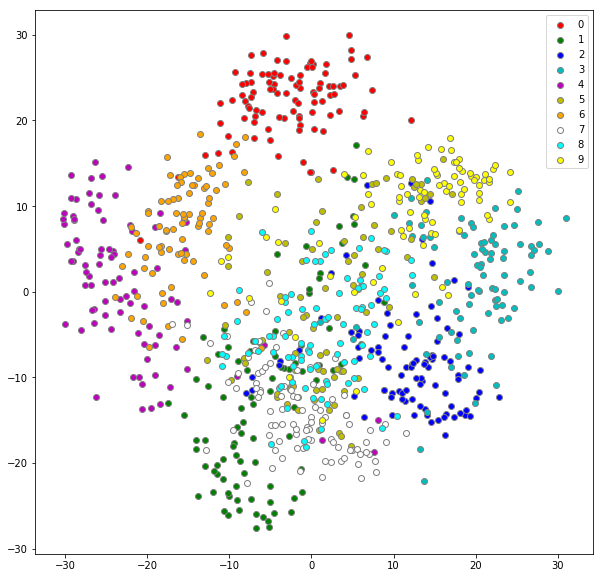

In [8]:
# plot of all the numbers
plot_PCA_2D(pcafeatures_train, target=y_train, target_names=digits.target_names)

## Transforming our input matrix X for use in classification/clustering 

Here we did PCA for visualization. But we can take our new N x k matrix (where k = number principal components) as input to regression, classification, clustering, etc. 

In [9]:
X_transf = pca.transform(X_train)
print("shape of original X_train:", X_train.shape)
print("shape of X_train using 2 principal components:", X_transf.shape, "\n")
print(X_transf)

shape of original X_train: (898, 64)
shape of X_train using 2 principal components: (898, 2) 

[[-22.34770998  14.5918849 ]
 [ 13.11376566  11.09848957]
 [ -2.47877105 -11.03540522]
 ...
 [ 11.5410759  -11.52061118]
 [ -6.8685145   -6.81615132]
 [-14.08235999 -17.33286872]]


In [10]:
pca.explained_variance_ratio_

array([0.15053965, 0.1340214 ])

In [11]:
# to understand the importance of each variable in each PC, look at the correlations:

pd.DataFrame(pca.components_, index = ['PC1','PC2'])

# remember, signs don't matter, just direction in space

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
PC1,2.604886e-17,0.022012,0.245870,0.149019,0.008413,0.057548,-0.003443,-0.002394,0.000608,0.131995,...,0.096727,-0.002494,-0.000024,0.018128,0.259222,0.148867,0.019105,0.109864,0.053449,0.013766
PC2,-1.344796e-18,-0.015025,-0.065513,-0.014758,-0.017650,-0.081172,-0.047625,-0.007324,-0.000123,-0.029296,...,0.101636,-0.001144,-0.000059,-0.014257,-0.084471,0.018759,0.172007,0.127659,-0.007841,-0.009370


In [12]:
pca.singular_values_

array([403.77317879, 380.97730406])

## Choosing number of components with a scree plot

Choosing two or three components makes sense if we're using PCA for visualization. But what if we're trying to do feature extraction and need to use the components as input for our classifcation/clustering task? Then we might use a scree plot to choose the number of components. 

In [13]:
pca2 = PCA(n_components=15)
pca2.fit(X_train)
pcafeatures_train2 = pca2.transform(X_train)

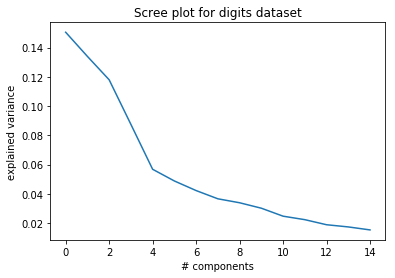

In [14]:
plt.plot(pca2.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

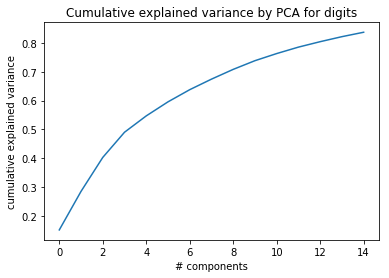

In [15]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');